In [77]:
import pandas as pd
import scipy as sp
import sklearn as skl
import numpy as np
import matplotlib as mtplt
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [78]:
bdmg = pd.read_csv('../files/blade_damage_assessment.csv', low_memory=False)
#bdmgtest = pd.read_csv('../files/blade_damage_assessment_test.csv', low_memory=False)

In [79]:
bdmg.head(5)

,engine_id,customer,engine_type,category,damage,flight_id,t_1,t_2,t_3,t_4,t_oil,p_oil,vibrations_2,vibrations_4,core_speed,fan_speed,thrust
0,700000,ACC,EX-50B,non-failed,38,1,27.169333,97.409398,568.554307180454,800.617771526119,73.664163,59.755336,0.0844030348911414,0.288484308226124,103.988490040037,86.759646,43824.077117
1,700000,ACC,EX-50B,non-failed,38,2,34.423444,131.146137,709.525734761479,904.861162536342,83.995234,91.238090,0.11583599227328,0.260483903090653,110.245548851895,92.174964,48131.620917
2,700000,ACC,EX-50B,non-failed,38,3,21.498867,95.264770,554.715309731843,779.022122640642,88.876758,99.558113,0.146035417636678,0.283297051916144,103.556756846575,88.105862,43676.985766
3,700000,ACC,EX-50B,non-failed,38,4,19.168106,82.892583,526.308476851884,757.484591914129,75.986135,102.696245,0.805832251423062,0.139379412491953,102.115886237848,85.823801,42946.711363
4,700000,ACC,EX-50B,non-failed,38,5,15.651451,88.250109,639.345044901446,814.660706963478,83.866920,96.889143,0.314611446543913,-0.00690196872612958,107.04135764277,90.942846,46685.678299


In [80]:
#pre clean - all na
totorg = bdmg.shape[0]
org= bdmg.shape[0]
bdmg.dropna(how='all') #drop all rows that all columns are NA
fin = bdmg.shape[0]
del1 = org - fin
print('deleted rows'+ str(del1))

deleted rows0


In [81]:
# data clean 1 - temperatures
org= bdmg.shape[0]
#bdmg["t_3"] = bdmg["t_3"].astype(str).convert_objects(convert_numeric=True)
bdmg["t_3"] = pd.to_numeric(bdmg["t_3"],errors="coerce")
bdmg["t_4"] = pd.to_numeric(bdmg["t_4"],errors="coerce")
bdmg.dropna(subset=['t_3'])
bdmg.dropna(subset=['t_4'])

bdmg = bdmg.drop(bdmg[bdmg.t_1 < -273].index)
bdmg = bdmg.drop(bdmg[bdmg.t_2 < -273].index)
bdmg = bdmg.drop(bdmg[bdmg.t_3 < -273].index)
bdmg = bdmg.drop(bdmg[bdmg.t_4 < -273].index)
bdmg = bdmg.drop(bdmg[bdmg.t_oil < -273].index)
fin = bdmg.shape[0]
del2 = org - fin
print('deleted rows'+ str(del2))

deleted rows299


In [82]:
#data clean 2 - speeds & thrust
org= bdmg.shape[0]

bdmg['core_speed'] = pd.to_numeric(bdmg['core_speed'],errors='coerce')
bdmg['fan_speed'] = pd.to_numeric(bdmg['core_speed'],errors='coerce')
bdmg['thrust'] = pd.to_numeric(bdmg['thrust'],errors='coerce')
bdmg.dropna(subset=['core_speed'])
bdmg.dropna(subset=['fan_speed'])
bdmg.dropna(subset=['thrust'])

bdmg = bdmg.drop(bdmg[bdmg.core_speed < 0].index)
bdmg = bdmg.drop(bdmg[bdmg.fan_speed < 0].index)
bdmg = bdmg.drop(bdmg[bdmg.thrust < 0].index)

fin = bdmg.shape[0]
del3 = org -fin
print('deleted rows'+ str(del3))

deleted rows186


In [83]:
#data clean 3 - preasure
org= bdmg.shape[0]

bdmg['p_oil'] = pd.to_numeric(bdmg['p_oil'],errors='coerce')
bdmg.dropna(subset=['p_oil'])

bdmg = bdmg.drop(bdmg[bdmg.p_oil < 0].index)

fin = bdmg.shape[0]
del4 = org -fin
print('deleted rows'+ str(del4))

deleted rows0


In [84]:
#data clean 4 - vibrations
org= bdmg.shape[0]

bdmg['vibrations_2'] = pd.to_numeric(bdmg['vibrations_2'],errors='coerce')
bdmg.dropna(subset=['vibrations_2'])
bdmg['vibrations_4'] = pd.to_numeric(bdmg['vibrations_4'],errors='coerce')
bdmg.dropna(subset=['vibrations_4'])

fin = bdmg.shape[0]
del5 = org -fin
print('deleted rows'+ str(del5))

print('deleted rows' + str(del1+del2+del3+del4+del5))
print('percentage deleted rows '+str(((del1+del2+del3+del4+del5)/totorg)*100 ) +'%')

deleted rows0
deleted rows485
percentage deleted rows 0.02472728607583578%


In [85]:
# categorizar columnas
# engine type
bdmg.loc[bdmg['engine_type'] == 'EX-50A','engine_type'] = 1 # EX-50A => 1
bdmg.loc[bdmg['engine_type'] == 'EX-50B','engine_type'] = 2 # EX-50A => 2
#failed
bdmg.loc[bdmg['category'] == 'failed','category'] = 1 # failed => 1
bdmg.loc[bdmg['category'] == 'non-failed','category'] = 0 # non failed => 0

In [86]:
engID = (pd.Series.value_counts(bdmg['engine_id']))
engTyp = (pd.Series.value_counts(bdmg['engine_type']))
custName = (pd.Series.value_counts(bdmg['customer']))
flightID = (pd.Series.value_counts(bdmg['flight_id']))

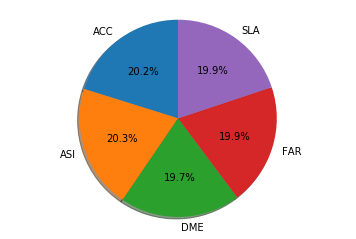

In [87]:
labels = 'ACC', 'ASI', 'DME', 'FAR', 'SLA'


sizes = [custName['ACC'], 
         custName['ASI'],
         custName['DME'],
         custName['FAR'],
         custName['SLA']
        ]

explode = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [88]:

print (custName)
#print(bdmg[(bdmg['engine_type']==2) & (bdmg['customer']=='ACC')])
print(bdmg[(bdmg['engine_type']==1) & (bdmg['customer']=='DME')])

ASI    398268
ACC    395756
FAR    390478
SLA    389802
DME    386607
Name: customer, dtype: int64
         engine_id customer engine_type category  damage  flight_id  \
39854       700034      DME           1        0      25          1   
39855       700034      DME           1        0      25          2   
39856       700034      DME           1        0      25          3   
39857       700034      DME           1        0      25          4   
39858       700034      DME           1        0      25          5   
39859       700034      DME           1        0      25          6   
39860       700034      DME           1        0      25          7   
39861       700034      DME           1        0      25          8   
39862       700034      DME           1        0      25          9   
39863       700034      DME           1        0      25         10   
39864       700034      DME           1        0      25         11   
39865       700034      DME           1        0 

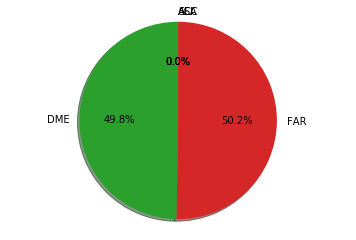

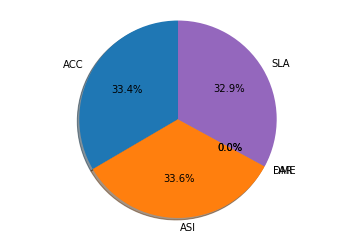

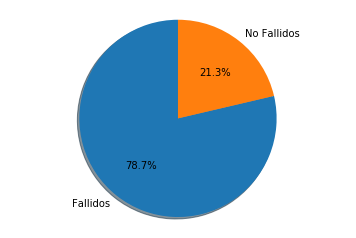

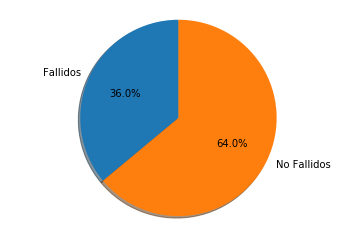

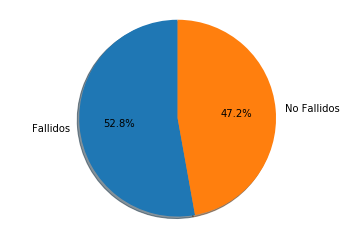

In [123]:
def graficamela(data, explode, labels):
    fig1, ax1 = plt.subplots()
    ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

labels = 'ACC', 'ASI', 'DME', 'FAR', 'SLA'
labels_f = 'Fallidos', 'No Fallidos'

datas = [
    bdmg[(bdmg['engine_type']==1) & (bdmg['customer']=='ACC')],
    bdmg[(bdmg['engine_type']==1) & (bdmg['customer']=='ASI')],
    bdmg[(bdmg['engine_type']==1) & (bdmg['customer']=='DME')],
    bdmg[(bdmg['engine_type']==1) & (bdmg['customer']=='FAR')],
    bdmg[(bdmg['engine_type']==1) & (bdmg['customer']=='SLA')],
    bdmg[(bdmg['engine_type']==2) & (bdmg['customer']=='ACC')],
    bdmg[(bdmg['engine_type']==2) & (bdmg['customer']=='ASI')],
    bdmg[(bdmg['engine_type']==2) & (bdmg['customer']=='DME')],
    bdmg[(bdmg['engine_type']==2) & (bdmg['customer']=='FAR')],
    bdmg[(bdmg['engine_type']==2) & (bdmg['customer']=='SLA')],
    bdmg[bdmg['category']==0],
    bdmg[bdmg['category']==1],
    bdmg[(bdmg['category']==0) & (bdmg['engine_type']==1)],
    bdmg[(bdmg['category']==0) & (bdmg['engine_type']==2)],
    bdmg[(bdmg['category']==1) & (bdmg['engine_type']==1)],
    bdmg[(bdmg['category']==1) & (bdmg['engine_type']==2)],
]

data_1 = []
data_2 = []
data_3 = []
data_4 = []
data_5 = []

i = 0

for data in datas:
    if 5 > i:
        data_1.append(data['engine_id'].count())
    elif 10 > i:
        data_2.append(data['engine_id'].count())
    elif 12 > i:
        data_3.append(data['engine_id'].count())
    elif 14 > i:
        data_4.append(data['engine_id'].count())
    elif 16 > i:
        data_5.append(data['engine_id'].count())
    i += 1

explode = (0, 0, 0, 0, 0) 
explode_f = (0, 0) 

graficamela(data_1, explode, labels)
graficamela(data_2, explode, labels)
graficamela(data_3, explode_f, labels_f)
graficamela(data_4, explode_f, labels_f)
graficamela(data_5, explode_f, labels_f)


In [ ]:
b1g = bdmg[(bdmg['engine_type']==1) & (bdmg['category']==0)]
b1f = bdmg[(bdmg['engine_type']==1) & (bdmg['category']==1)]
b2g = bdmg[(bdmg['engine_type']==2) & (bdmg['category']==0)]
b2f = bdmg[(bdmg['engine_type']==2) & (bdmg['category']==1)]

print("engine 1")
print("min no fallo " + str(b1g['damage'].min()))
print("max no fallo " + str(b1g['damage'].max()))
print("min si fallo " + str(b1f['damage'].min()))
print("max si fallo " + str(b1f['damage'].max()))
print("engine 2")
print("min no fallo " + str(b2g['damage'].min()))
print("max no fallo " + str(b2g['damage'].max()))
print("min si fallo " + str(b2f['damage'].min()))
print("max no fallo " + str(b2f['damage'].max()))

'''
ind = np.arange(5)                # the x locations for the groups
width = 0.35 
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, b1g,width, color='black')
rects2 = ax.bar(ind, b1f,width, color='red')

ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,45)
ax.set_ylabel('Damage')
ax.set_title('algo')

## add a legend
ax.legend( (rects1[0], rects2[0]), ('good', 'bad') )

plt.show()
'''
#subset = bdmg[['engine_type','category', 'damage']]
#subset.plot()
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(True)
subset.plot(table=True, ax=ax)

engine 1
min no fallo 9
max no fallo 41
min si fallo 51
max si fallo 83
engine 2
min no fallo 4
max no fallo 46
min si fallo 50
max no fallo 82
